In [1]:
%load_ext autoreload
%autoreload 2

%reset

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [33]:
from pySurf.data2D_class import Data2D
from pySurf.readers.instrumentReader import fitsWFS_reader
from plotting.multiplots import plot_difference
from plotting.backends import maximize

Read two data with custom settings for scales:

In [29]:
"""INPUT SETTINGS"""
plt.ion()
file1="181016_01_PCO2S06_1009_08.fits"
file2="181016_02_PCO2S06_1009_08.fits"
scale=101.6/116   #ratio between mm and pixels
ytox=220./200   #aspect ratio of pixel
strip = True # strip nan frame
""""""
data1 = Data2D(*fitsWFS_reader(file1,scale=(scale,scale,1),center=(0,0),strip=strip,
                              ytox=ytox,ypix=1),units=['mm','mm','um'])
data2 = Data2D(*fitsWFS_reader(file2,scale=(scale,scale,1), center=(0,0),strip=strip,
                              ytox=ytox,ypix=1),units=['mm','mm','um'])

The part has been removed for the treatment and was put back in a position that can be different from the one of  the first measurement. Plot the two data. Before calculating difference, I want to align the two surfaces.

<Axes: xlabel='X (mm)', ylabel='Y (mm)'>

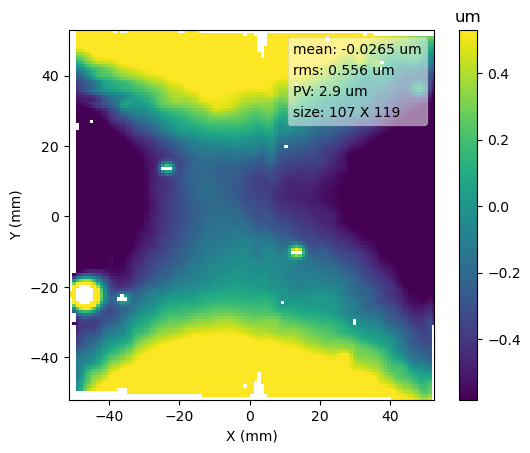

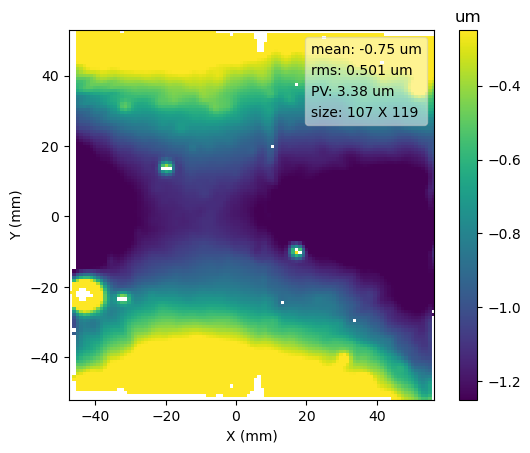

In [8]:
data1.plot()
plt.figure()
data2.plot()

Level by removing low order polynomial of degree 10, to highlight features. User selects point-and-click markers on leveled data.
We need to change the matplotlib backend to make it interactive. Markers and transformation (as function) are returned:

In [23]:
%matplotlib qt

In [24]:
d1l = data1.level((10,0))                      # remove low order on y axis
d2l = data2.level((10,0))                
dtrans, m, mtrans = data1.align_interactive(data2, retall=True)   # select points, return transformation 

cids established:
 [14, 15, 16]
cids established:
 [17, 18, 19]
disconnecting cids:
----
isinteractive? True
isinteractive? True
disconnecting cids:
----
isinteractive? True
isinteractive? True
exit


In [25]:
dtrans, m ,mtrans

(<.Data2D "" at 0x1a794f4ad50>,
 (array([[ 10.02553949,  20.34145117],
         [ 29.80367816, -29.39192666],
         [-35.86742306, -23.43928298]]),
  array([[ 10.28738598,  20.1494304 ],
         [ 33.90593993, -29.00788513],
         [-31.189099  , -22.67119993]])),
 <function pySurf.affine2D.apply2D.<locals>.func3d(x)>)

In [26]:
%matplotlib inline

Transformation is applied to first set of data and results are visualized:

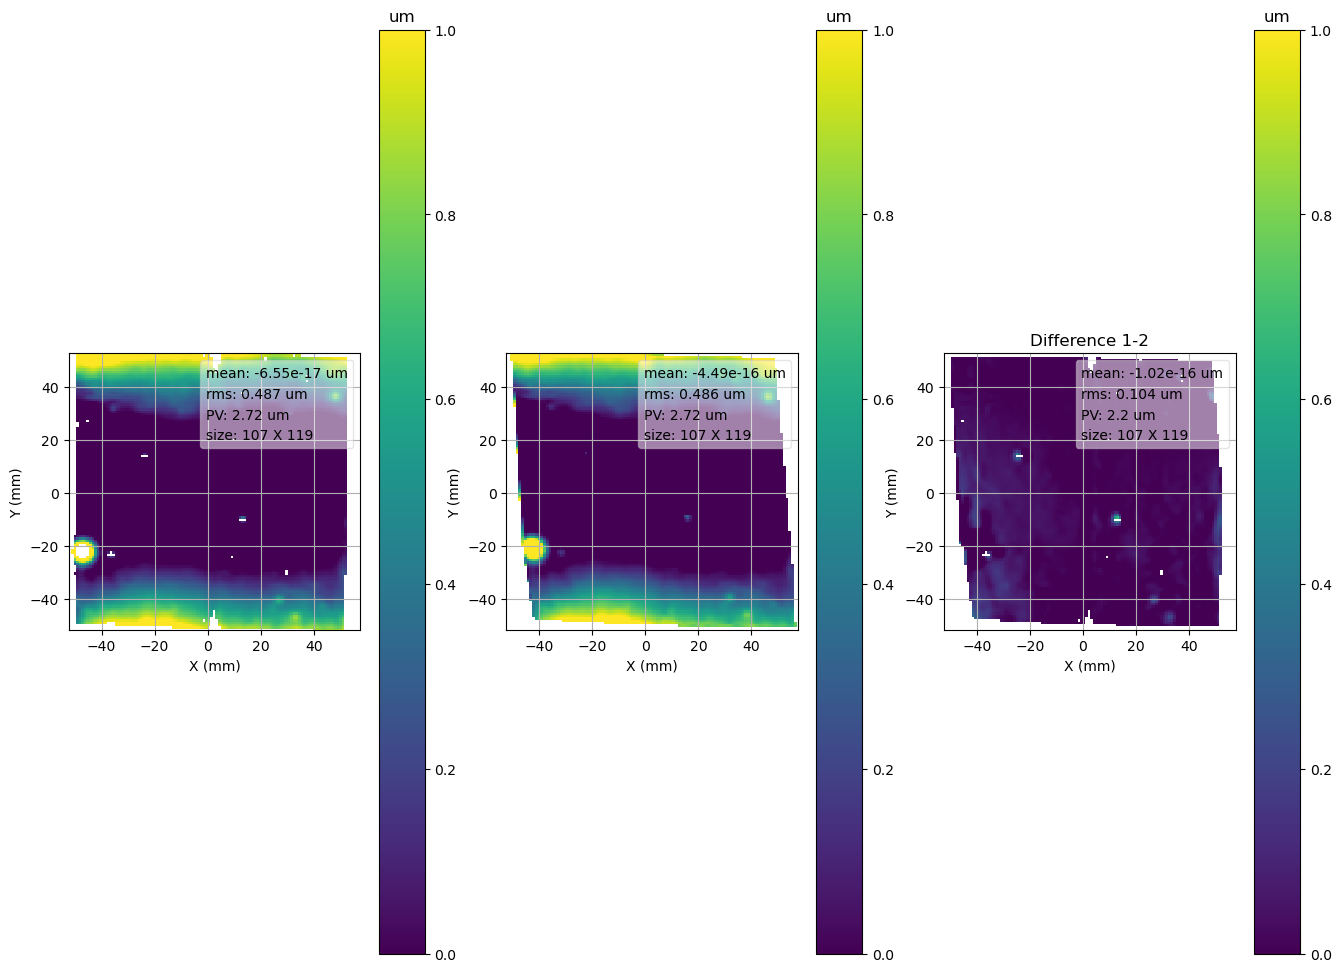

In [38]:
data1_trans = data1.apply_transform(mtrans)  # apply transform to first (unleveled) data set
plt.figure(figsize=(16,12))    # python command to create figure
diff = plot_difference(data1,data1_trans)    # plot data and difference